# TCU Votes and STJ Judgments data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
sns.set_style("whitegrid")

In [2]:
tcu = pd.read_csv('data/raw_text/jurisprudencias_tcu.csv', index_col=0)
stj = pd.read_csv('data/raw_text/jurisprudencias_stj.csv', index_col=0)

In [3]:
tcu.head(5)

,AREA,TEMA,SUBTEMA,ENUNCIADO,PROCESSO,ANO,TIPO_PROCESSO,RELATOR,VOTO
0,Responsabilidade,Convênio,Gestor sucessor,SÚMULA TCU 230: Compete ao prefeito sucessor a...,031.777/2010-4,2010,Tomada de Contas Especial,Augusto Nardes,\n TRIBUNAL DE CONTAS DA...
1,Responsabilidade,Convênio,Gestor sucessor,SÚMULA TCU 230: Compete ao prefeito sucessor a...,007.653/2009-2,2009,Tomada de Contas Especial,Vital do Rêgo,\n TRIBUNAL DE CONTAS DA...
2,Responsabilidade,Convênio,Gestor sucessor,SÚMULA TCU 230: Compete ao prefeito sucessor a...,029.768/2010-1,2010,Tomada de Contas Especial,José Mucio Monteiro,\n TRIBUNAL DE CONTAS DA...
3,Responsabilidade,Convênio,Gestor sucessor,SÚMULA TCU 230: Compete ao prefeito sucessor a...,009.607/2011-0,2011,Tomada de Contas Especial,Walton Alencar Rodrigues,\n TRIBUNAL DE CONTAS DA...
4,Responsabilidade,Convênio,Gestor sucessor,SÚMULA TCU 230: Compete ao prefeito sucessor a...,006.901/2013-1,2013,Tomada de Contas Especial,André de Carvalho,\n TRIBUNAL DE CONTAS DA...


No dados do TCU, uma Jurisprudência está mapeada pela coluna ENUNCIADO.

In [4]:
len(tcu.ENUNCIADO)

371

No dados do STJ, uma Jurisprudência está mapeada pela coluna TEMA.

In [5]:
len(stj.TEMA.unique())

1458

In [6]:
stj.head(5)

,MATERIA,NATUREZA,TEMA,PROCESSO,RELATOR,ORGAO,DATA_JULGAMENTO,DATA_PUBLICACAO,EMENTA
0,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,AgRg no AREsp 331607 / SP\nAGRAVO REGIMENTAL N...,Relator(a)\nMinistro HERMAN BENJAMIN (1132),T2 - SEGUNDA TURMA,15/08/2013,16/09/2013,PROCESSUAL CIVIL. AGRAVO REGIMENTAL. ART. 535 ...
1,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,RMS 31995 / RS\nRECURSO ORDINÁRIO EM MANDADO D...,Relator(a)\nMinistro SÉRGIO KUKINA (1155),T1 - PRIMEIRA TURMA,15/08/2013,26/08/2013,RECURSO ORDINÁRIO EM MANDADO DE SEGURANÇA. ORD...
2,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,RMS 32169 / RN\nRECURSO ORDINÁRIO EM MANDADO D...,Relator(a)\nMinistro HUMBERTO MARTINS (1130),T2 - SEGUNDA TURMA,02/05/2013,17/06/2013,PROCESSUAL CIVIL E ADMINISTRATIVO. MANDADO DE ...
3,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,AgRg no REsp 1256653 / SP\nAGRAVO REGIMENTAL N...,Relator(a)\nMinistro BENEDITO GONÇALVES (1142),T1 - PRIMEIRA TURMA,28/08/2012,05/09/2012,PROCESSUAL CIVIL E ADMINISTRATIVO. AGRAVO REGI...
4,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,MS 15313 / DF\nMANDADO DE SEGURANÇA\n2010/0092...,Relator(a)\nMinistro MAURO CAMPBELL MARQUES (1...,S1 - PRIMEIRA SEÇÃO,09/11/2011,18/11/2011,ADMINISTRATIVO. MANDADO DE SEGURANÇA. SERVIDOR...


# Histograma Precedentes x Jurisprudência

#### TCU

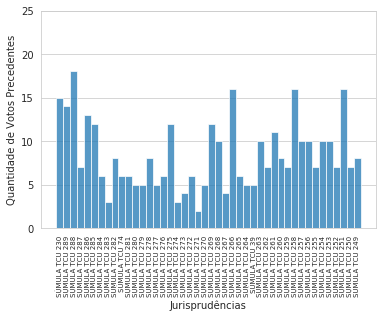

In [7]:
ax_enunciado = sns.histplot(tcu.ENUNCIADO, discrete=True)
labels = [text.split(':')[0] for text in tcu.ENUNCIADO.unique()]
ax_enunciado.set_xticklabels(labels, rotation=90, size = 7)
ax_enunciado.set(xlabel='Jurisprudences', ylabel='Precedent Votes count')
ax_enunciado.set_ylim(0,25)
ax_enunciado.xaxis.grid(False) 
plt.savefig('images/tcu/precedentes_jurisprudencia.pdf', bbox_inches='tight')

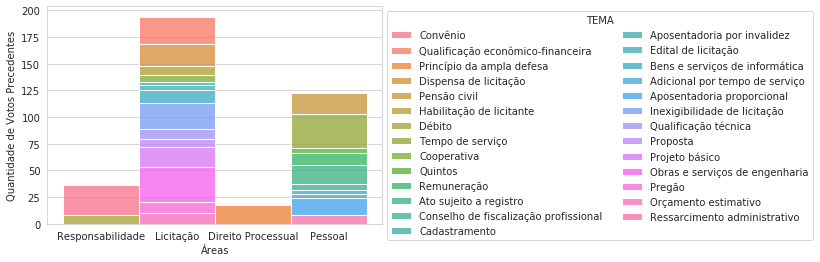

In [8]:
ax = sns.histplot(data=tcu, x="AREA", hue="TEMA", multiple="stack")
ax.set(xlabel='Areas', ylabel='Precedent Votes count')
ax.xaxis.grid(False) 
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), ncol=2)
plt.savefig('images/tcu/voto_area_tema.pdf', bbox_inches='tight')

#### STJ

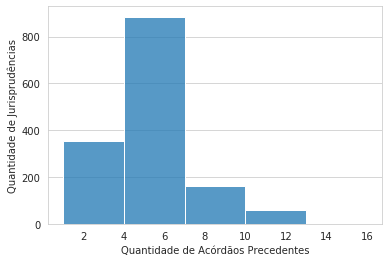

In [9]:
from collections import Counter
cnt = Counter(stj.TEMA)

ax_tema = sns.histplot(list(cnt.values()), binwidth=3)
ax_tema.set(xlabel='Precedent Judgments count', ylabel='Jurisprudence count')
ax_tema.xaxis.grid(False) 
plt.savefig('images/stj/precedentes_jurisprudencia.pdf', bbox_inches='tight')

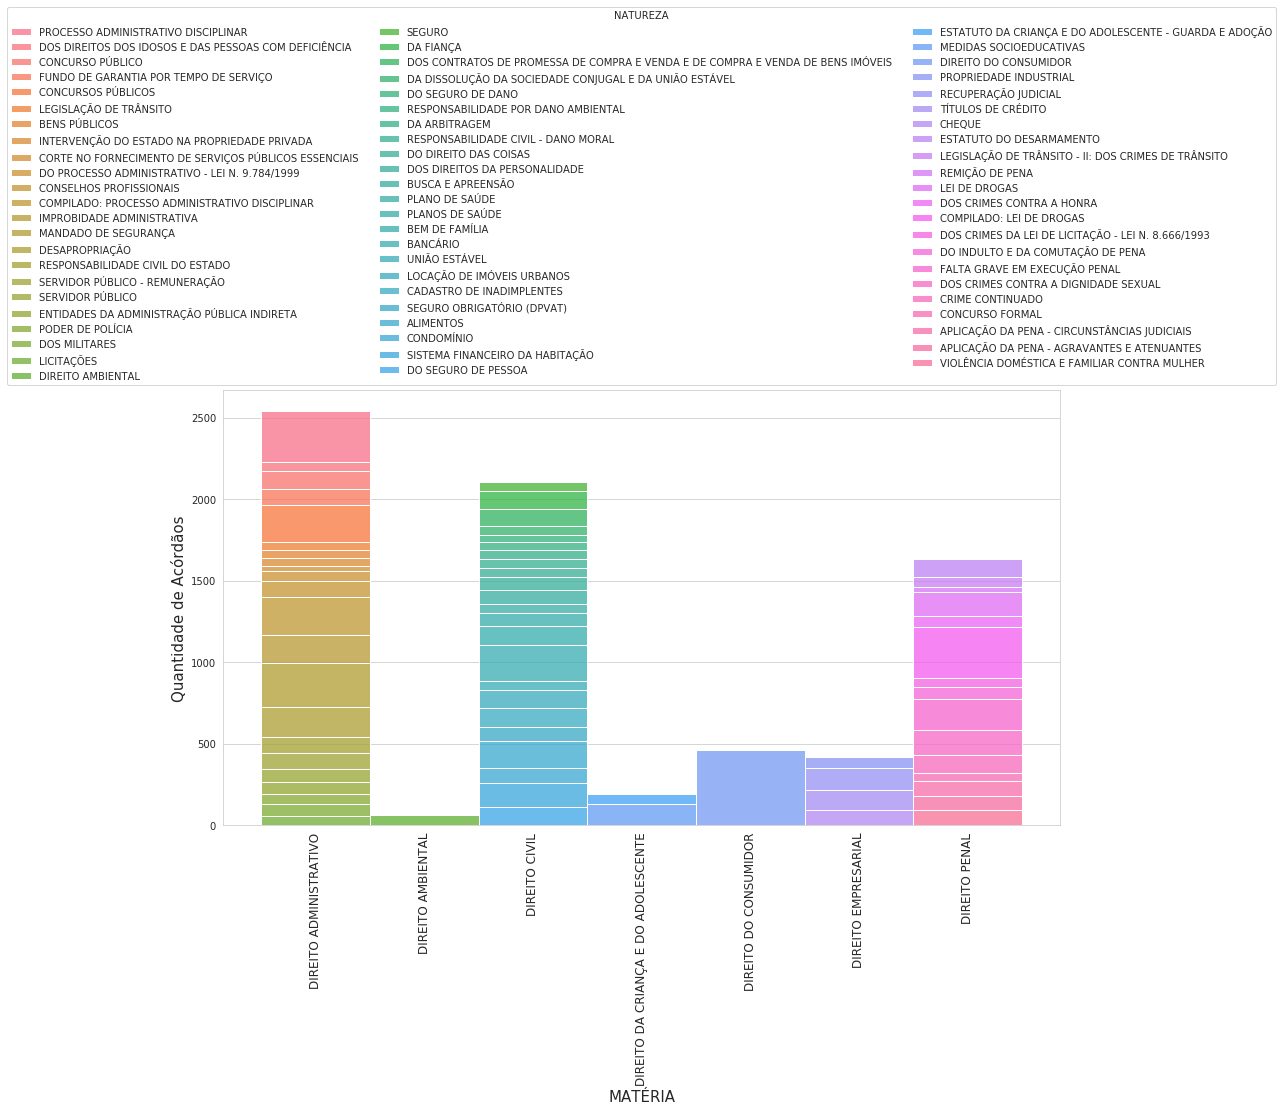

In [10]:
plt.figure(figsize=(15,8))

ax_materia = sns.histplot(data=stj, x="MATERIA", hue='NATUREZA',multiple="stack")
plt.xticks(rotation=90,size=12)

# ax_materia.set(xlabel='MATÉRIA', ylabel='Quantidade de Acórdãos')
ax_materia.set_xlabel("SUBJECT",fontsize=15)
ax_materia.set_ylabel("Precedent Judgments count",fontsize=15)

ax_materia.xaxis.grid(False)
sns.move_legend(ax_materia, "lower center", bbox_to_anchor=(0.5, 1),ncol=3)
plt.savefig('images/stj/acordao_materia_natureza.pdf', bbox_inches='tight')

# Nuvem de palavras

In [11]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/danieljunior/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### TCU

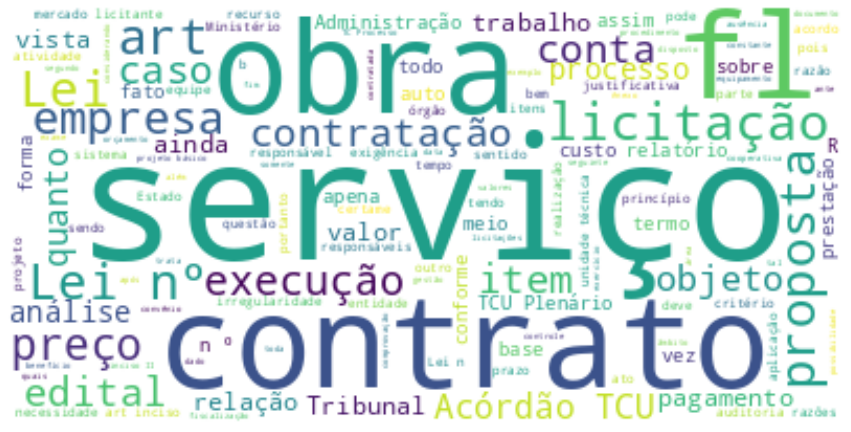

In [12]:
tcu_text = " ".join(i for i in tcu.VOTO)
wordcloud_tcu = WordCloud(stopwords=stopwords, background_color="white").generate(tcu_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud_tcu, interpolation='bilinear')
plt.axis("off")
# plt.show()
plt.savefig('images/tcu/nuvem_precedentes.pdf', bbox_inches='tight')

#### STJ

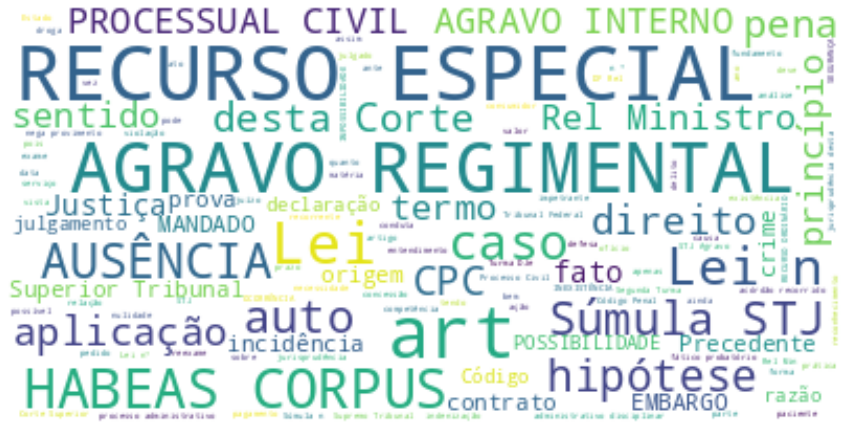

In [13]:
stj_text = " ".join(i for i in stj.EMENTA)
wordcloud_stj = WordCloud(stopwords=stopwords, background_color="white").generate(stj_text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud_stj, interpolation='bilinear')
plt.axis("off")
# plt.show()
plt.savefig('images/stj/nuvem_precedentes.pdf', bbox_inches='tight')

# Histograma Palavras X Precedentes

#### TCU

In [14]:
tcu_groups = []
tcu_frequencies = []
for group_name, df_group in tcu.groupby("ENUNCIADO"):
    freq = df_group.VOTO.apply(lambda x: len(x.split(' '))).values
    group = [group_name.split(':')[0]] * len(freq)
    tcu_groups += group
    tcu_frequencies += freq.tolist()

freq_palavras_tcu = pd.DataFrame(
    {'palavras': tcu_frequencies,
     'JURISPRUDÊNCIA': tcu_groups
    })

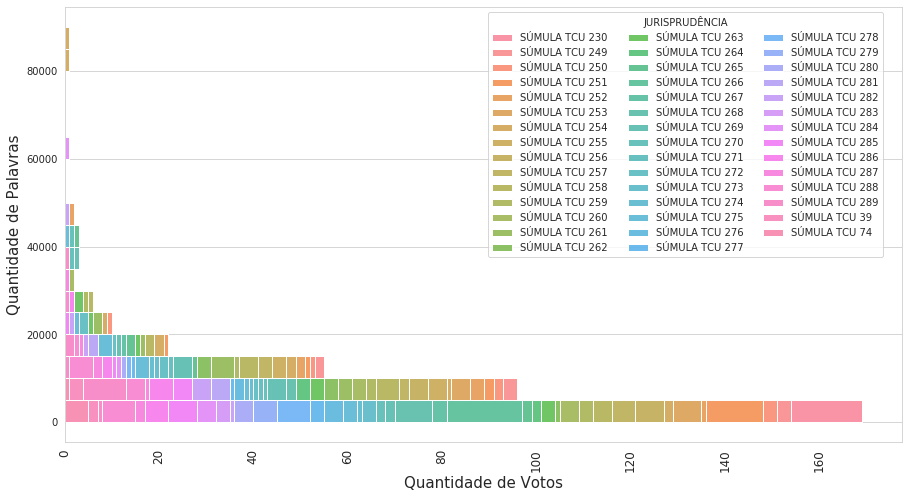

In [15]:
plt.figure(figsize=(15,8))

ax_freq_tcu = sns.histplot(data=freq_palavras_tcu, y="palavras", hue='JURISPRUDÊNCIA',multiple="stack",binwidth=5000)
plt.xticks(rotation=90,size=12)

ax_freq_tcu.set_xlabel("Votes count",fontsize=15)
ax_freq_tcu.set_ylabel("Word count",fontsize=15)

ax_freq_tcu.xaxis.grid(False)
sns.move_legend(ax_freq_tcu, "upper left", bbox_to_anchor=(0.5, 1),ncol=3)
plt.savefig('images/tcu/palavras_precedentes.pdf', bbox_inches='tight')

#### STJ

In [16]:
stj_groups = []
stj_frequencies = []
for group_name, df_group in stj.groupby("TEMA"):
    freq = df_group.EMENTA.apply(lambda x: len(x.split(' '))).values
    group = [group_name.split(':')[0]] * len(freq)
    stj_groups += group
    stj_frequencies += freq.tolist()

freq_palavras_stj = pd.DataFrame(
    {'palavras': stj_frequencies,
     'jurisprudencia': stj_groups
    })

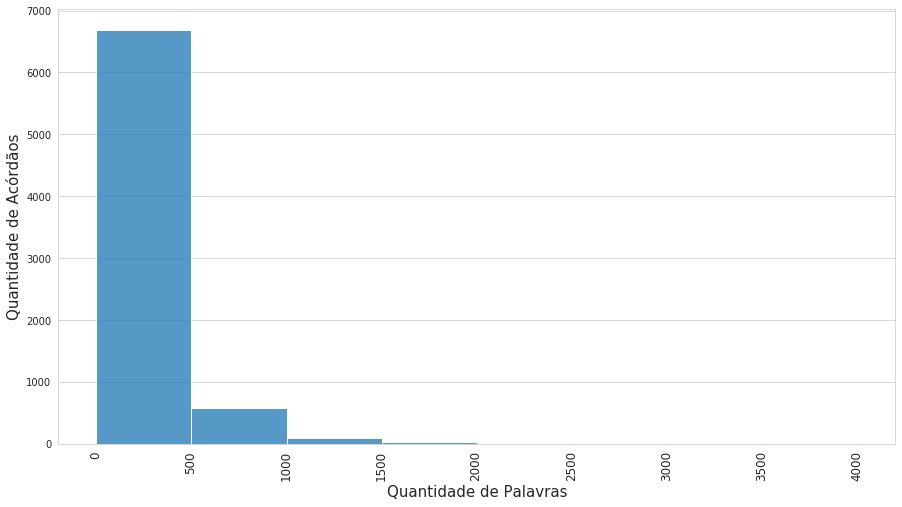

In [17]:
plt.figure(figsize=(15,8))

ax_freq_stj = sns.histplot(data=freq_palavras_stj, x="palavras", multiple="stack",binwidth=500)
plt.xticks(rotation=90,size=12)

ax_freq_stj.set_xlabel("Word count",fontsize=15)
ax_freq_stj.set_ylabel("Judgments count",fontsize=15)

ax_freq_stj.xaxis.grid(False)
# sns.move_legend(ax_freq_stj, "upper left", bbox_to_anchor=(0.5, 1),ncol=3)
plt.savefig('images/stj/palavras_precedentes.pdf', bbox_inches='tight')

# STS

In [38]:
tcu_sts = pd.read_csv("data/sts/tcu_sts.csv")
stj_sts = pd.read_csv("data/sts/stj_sts.csv")

In [43]:
print(len(tcu_sts[tcu_sts.SPLIT == 'TRAIN']))
print(len(tcu_sts[tcu_sts.SPLIT == 'VALID']))
print(len(tcu_sts[tcu_sts.SPLIT == 'TEST']))

3389
438
1016


In [44]:
print(len(stj_sts[stj_sts.SPLIT == 'TRAIN']))
print(len(stj_sts[stj_sts.SPLIT == 'VALID']))
print(len(stj_sts[stj_sts.SPLIT == 'TEST']))

36010
4613
10814
